# 📘 Cholesky Decomposition

## ✅ Definition

For any real symmetric, positive definite matrix $A \in \mathbb{R}^{n \times n}$, the **Cholesky Decomposition** is:

$$
A = L L^\top
$$

Where:
- $L$ is a **lower triangular matrix** with positive diagonal entries.
- $L^\top$ is the transpose of $L$.

This method is a special case of LU decomposition, optimized for symmetric positive-definite matrices. It is often preferred for its numerical stability and efficiency.

## 🧪 Conditions

Cholesky decomposition exists and is unique **if and only if**:
- $A$ is **symmetric**: $A = A^\top$
- $A$ is **positive definite**: $x^\top A x > 0$ for all $x \ne 0$

## 🔧 Entry-Wise Formula

Let:

$$
A = \begin{bmatrix}
a_{11} & a_{12} & a_{13} \\
a_{12} & a_{22} & a_{23} \\
a_{13} & a_{23} & a_{33}
\end{bmatrix},
\quad
L = \begin{bmatrix}
\ell_{11} & 0 & 0 \\
\ell_{21} & \ell_{22} & 0 \\
\ell_{31} & \ell_{32} & \ell_{33}
\end{bmatrix}
$$

Then the entries of $L$ are computed as:

### 🔹 Diagonal entries:

For $i = 1, 2, \dots, n$:

$$
\ell_{ii} = \sqrt{ a_{ii} - \sum_{k=1}^{i-1} \ell_{ik}^2 }
$$

### 🔹 Off-diagonal entries (below the diagonal):

For $i > j$:

$$
\ell_{ij} = \frac{1}{\ell_{jj}} \left( a_{ij} - \sum_{k=1}^{j-1} \ell_{ik} \ell_{jk} \right)
$$

## 📌 Example

Given:

$$
A = \begin{bmatrix}
4 & 12 & -16 \\
12 & 37 & -43 \\
-16 & -43 & 98
\end{bmatrix}
$$

Then the Cholesky decomposition gives:

$$
L = \begin{bmatrix}
2 & 0 & 0 \\
6 & 1 & 0 \\
-8 & 5 & 3
\end{bmatrix}
\quad \text{such that} \quad A = LL^\top
$$

## ⚙️ Applications

- Solving linear systems: if $A = LL^\top$, solve $Ly = b$ then $L^\top x = y$
- Faster and more stable than LU decomposition for SPD matrices
- Used in:
  - Portfolio simulations (generate correlated Gaussian variables)
  - Kalman filters and Gaussian processes
  - Quadratic programming and optimization problems

## ✅ Summary

- Cholesky Decomposition is efficient for symmetric positive definite matrices.
- Entry-wise formulas allow direct construction.
- Widely used in numerical linear algebra, finance, and machine learning.

## Implementation

In [4]:
import numpy as np
import matplotlib.pyplot as plt
def cholesky(A):
    n = A.shape[0]
    L = np.zeros_like(A)
    for i in range(n):
        for j in range(i + 1):
            sum_k = np.dot(L[i, :j], L[j, :j])
            if i == j:
                L[i, j] = np.sqrt(A[i, i] - sum_k)
            else:
                L[i, j] = (A[i, j] - sum_k) / L[j, j]
    return L

In [5]:
def cholesky_test_example(A):
    L = cholesky(A)
    print("Cholesky Lower Matrix L:")
    print(L)
    A_reconstructed = L @ L.T
    print("Reconstructed A (L @ lower tringle):")
    print(A_reconstructed)
    assert np.allclose(A, A_reconstructed), f"Reconstruction failed for example {idx}"
    return L

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Ellipse
from mpl_toolkits.mplot3d import Axes3D

def cholesky_plot(A, L):
    """
    Performs and visualizes Cholesky decomposition for symmetric positive definite matrix A.
    Includes:
    - Heatmaps of A and L
    - Reconstruction error
    - 2D/3D MVN sampling and covariance geometry
    
    Parameters:
    A : np.ndarray
        Symmetric positive definite matrix (2x2 or 3x3 recommended for geometry)
    """

    # 1. Heatmaps of A and L
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.heatmap(A, annot=True, fmt=".2f", cmap="Blues", ax=axes[0])
    axes[0].set_title("Original Matrix A")

    sns.heatmap(L, annot=True, fmt=".2f", cmap="Greens", ax=axes[1])
    axes[1].set_title("Cholesky Factor L")
    plt.tight_layout()
    plt.show()

    # 2. Reconstruction error
    A_hat = L @ L.T
    error = np.linalg.norm(A - A_hat, ord='fro')
    print(f"Frobenius norm of reconstruction error: {error:.6f}")

    # 3. MVN Sampling and Covariance Geometry
    dim = A.shape[0]
    z = np.random.randn(dim, 1000)
    x = L @ z  # Correlated samples

    if dim == 2:
        # 2D: Scatter and ellipse
        plt.figure(figsize=(6, 6))
        plt.scatter(x[0], x[1], alpha=0.3, label='Samples')
        plt.axis('equal')
        plt.title("2D MVN via Cholesky")
        plt.xlabel("x1")
        plt.ylabel("x2")

        # Covariance ellipse
        eigvals, eigvecs = np.linalg.eigh(A)
        order = np.argsort(eigvals)[::-1]
        eigvals = eigvals[order]
        eigvecs = eigvecs[:, order]

        width, height = 2 * np.sqrt(eigvals)
        angle = np.degrees(np.arctan2(eigvecs[1, 0], eigvecs[0, 0]))
        ellipse = Ellipse((0, 0), width, height, angle=angle,
                          edgecolor='r', fc='None', lw=2, label='Covariance Ellipse')
        plt.gca().add_patch(ellipse)
        plt.legend()
        plt.grid(True)
        plt.show()

    elif dim == 3:
        # 3D: Scatter and ellipsoid
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(x[0], x[1], x[2], alpha=0.1, label='Samples')

        # Ellipsoid generation
        eigvals, eigvecs = np.linalg.eigh(A)
        order = np.argsort(eigvals)[::-1]
        eigvals = eigvals[order]
        eigvecs = eigvecs[:, order]

        u = np.linspace(0, 2 * np.pi, 50)
        v = np.linspace(0, np.pi, 50)
        x_ellip = np.outer(np.cos(u), np.sin(v))
        y_ellip = np.outer(np.sin(u), np.sin(v))
        z_ellip = np.outer(np.ones_like(u), np.cos(v))

        ellip_points = np.array([x_ellip.flatten(), y_ellip.flatten(), z_ellip.flatten()])
        ellip_scaled = eigvecs @ np.diag(np.sqrt(eigvals)) @ ellip_points
        x_e = ellip_scaled[0].reshape(x_ellip.shape)
        y_e = ellip_scaled[1].reshape(y_ellip.shape)
        z_e = ellip_scaled[2].reshape(z_ellip.shape)

        ax.plot_surface(x_e, y_e, z_e, color='r', alpha=0.2, edgecolor='k')
        ax.set_title("3D MVN via Cholesky")
        ax.set_xlabel("x1")
        ax.set_ylabel("x2")
        ax.set_zlabel("x3")
        plt.legend()
        plt.tight_layout()
        plt.show()

    else:
        print("Covariance visualization is only supported for 2×2 or 3×3 matrices.")

## Examples

### Example 1

In [9]:
example_1 = np.array([[6, 3], [3, 2.1]])

In [10]:
print("Example 1")
print("Matrix A :")
print(example_1)

Example 1
Matrix A :
[[6.  3. ]
 [3.  2.1]]


In [11]:
L1 = cholesky_test_example(example_1)

Cholesky Lower Matrix L:
[[2.44948974 0.        ]
 [1.22474487 0.77459667]]
Reconstructed A (L @ lower tringle):
[[6.  3. ]
 [3.  2.1]]


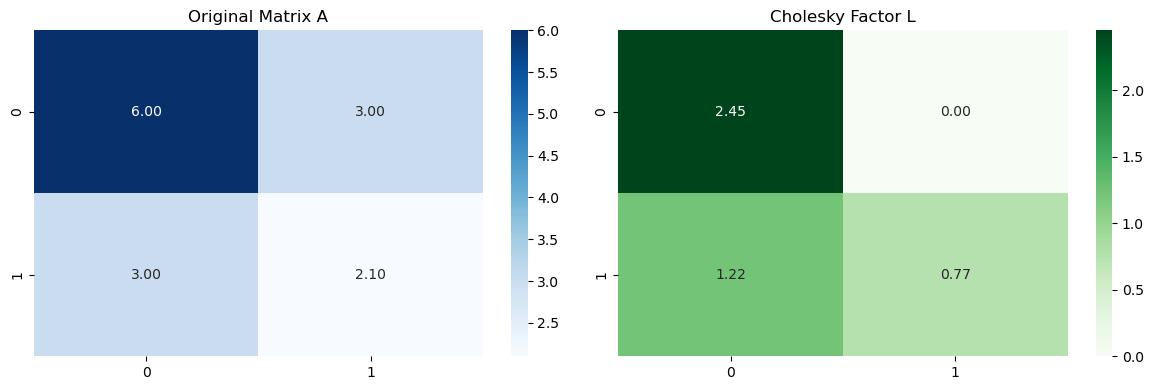

Frobenius norm of reconstruction error: 0.000000


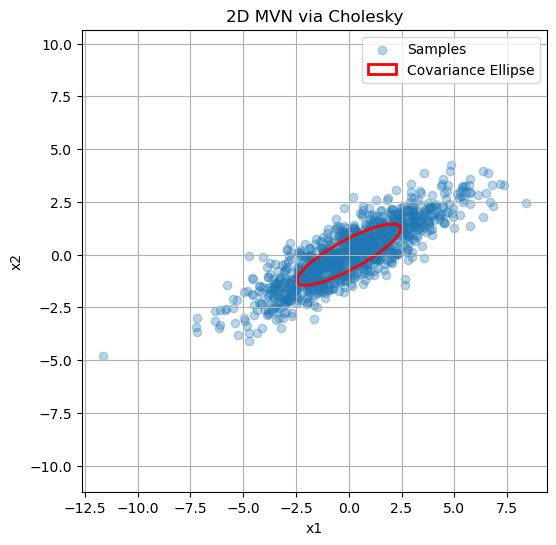

In [12]:
cholesky_plot(example_1, L1)

### Example 2

In [14]:
example_2 = np.array([[25, 15, -5], [15, 18, 0], [-5, 0, 11]])

In [15]:
print("Example 2")
print("Matrix A :")
print(example_2)

Example 2
Matrix A :
[[25 15 -5]
 [15 18  0]
 [-5  0 11]]


In [16]:
L2 = cholesky_test_example(example_2)

Cholesky Lower Matrix L:
[[ 5  0  0]
 [ 3  3  0]
 [-1  1  3]]
Reconstructed A (L @ lower tringle):
[[25 15 -5]
 [15 18  0]
 [-5  0 11]]


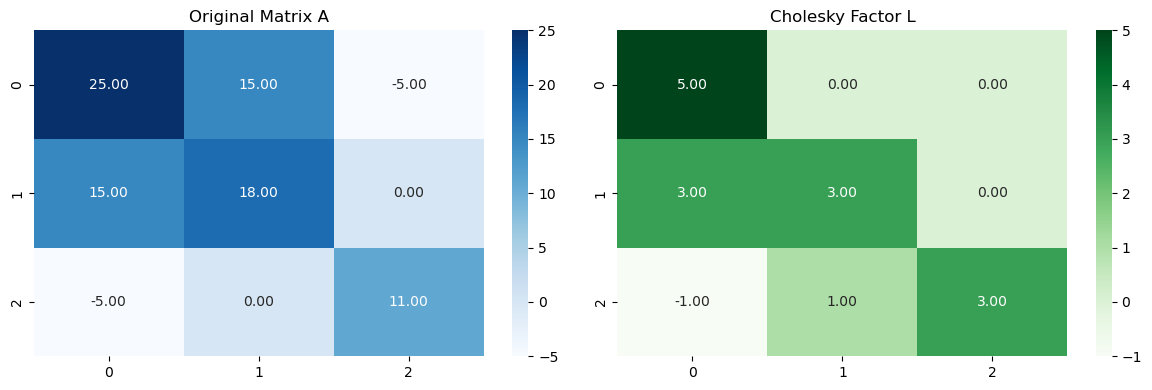

Frobenius norm of reconstruction error: 0.000000


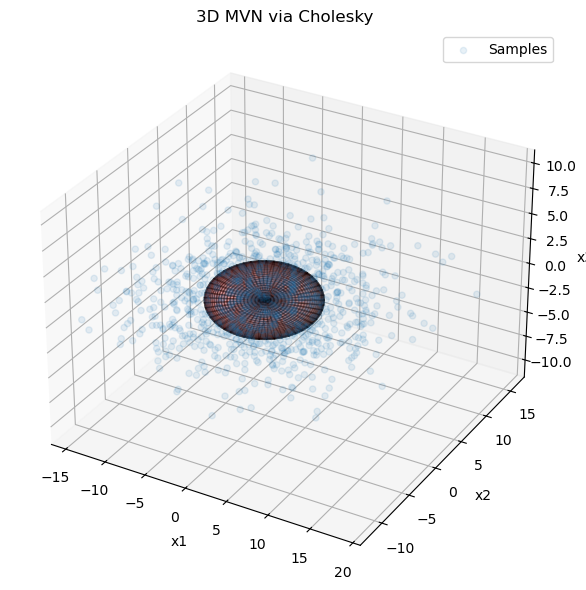

In [17]:
cholesky_plot(example_2, L2)

### Example 3

In [19]:
example_3 = np.array([[2.0, 0.5], [0.5, 1.0]])

In [20]:
print("Example 3")
print("Matrix A :")
print(example_3)

Example 3
Matrix A :
[[2.  0.5]
 [0.5 1. ]]


In [21]:
L3 = cholesky_test_example(example_3)

Cholesky Lower Matrix L:
[[1.41421356 0.        ]
 [0.35355339 0.93541435]]
Reconstructed A (L @ lower tringle):
[[2.  0.5]
 [0.5 1. ]]


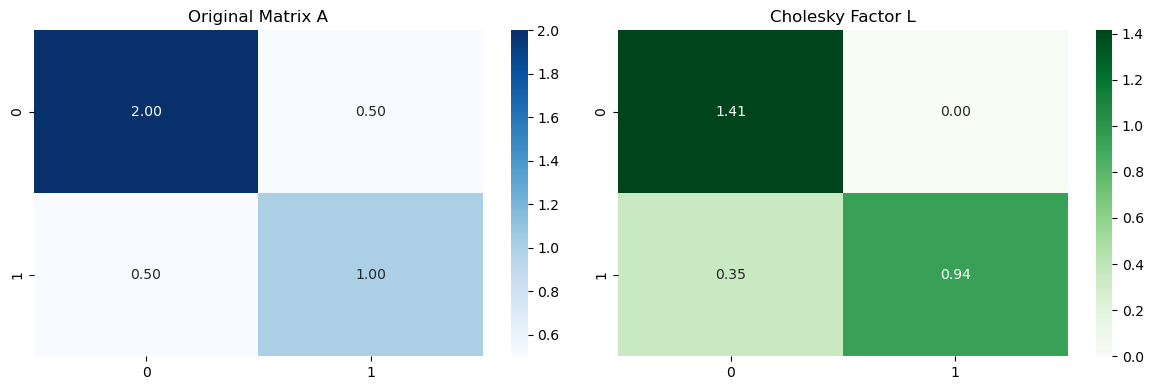

Frobenius norm of reconstruction error: 0.000000


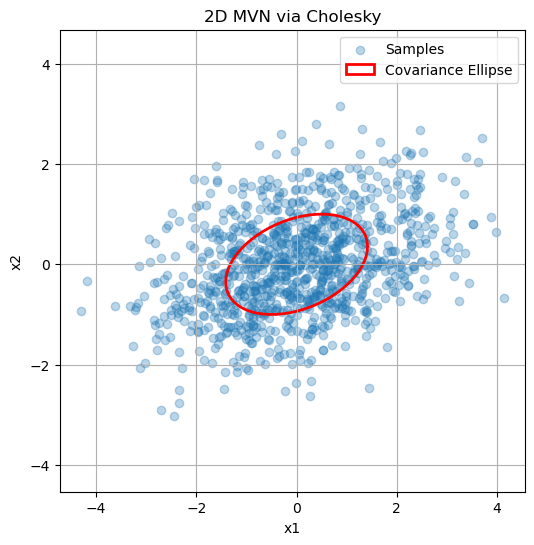

In [22]:
cholesky_plot(example_3, L3)

## Computational Aspects

- Complexity: O(n³), but with reduced constants due to symmetry.
- Faster than LU or QR for symmetric matrices.
- Storage efficient: only the lower triangle needs to be stored or computed.

## Applications in Quantitative Finance:
- Portfolio optimization : Used in inverting large covariance matrices to find the optimal asset weights in mean-variance optimization. 
- Monte Carlo simulation : Simulating correlated asset paths using Cholesky decomposition of the covariance matrix.